<a href="https://colab.research.google.com/github/adamrhurley/FYP/blob/main/MusicRecommenderSystem/corrWithModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving artists.csv to artists (1).csv
Saving userArtists.csv to userArtists (1).csv


In [ ]:
import io
numPlays = pd.read_csv(io.BytesIO(uploaded['userArtists.csv']))
artists = pd.read_csv(io.BytesIO(uploaded['artists.csv']))

In [ ]:
data = pd.merge(numPlays, artists, on='artistID')

In [ ]:
data = data.rename(columns={"weight": "plays"})

In [ ]:
data.head()

,userID,artistID,plays,name,url,pictureURL
0,2,51,13883,Duran Duran,http://www.last.fm/music/Duran+Duran,http://userserve-ak.last.fm/serve/252/155668.jpg
1,4,51,228,Duran Duran,http://www.last.fm/music/Duran+Duran,http://userserve-ak.last.fm/serve/252/155668.jpg
2,27,51,85,Duran Duran,http://www.last.fm/music/Duran+Duran,http://userserve-ak.last.fm/serve/252/155668.jpg
3,28,51,10,Duran Duran,http://www.last.fm/music/Duran+Duran,http://userserve-ak.last.fm/serve/252/155668.jpg
4,62,51,528,Duran Duran,http://www.last.fm/music/Duran+Duran,http://userserve-ak.last.fm/serve/252/155668.jpg


In [ ]:
artists.head()

,artistID,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [ ]:
data.groupby('name')['plays'].mean().head()

name
!!!             1413.000
!DISTAIN         628.500
!deladap          65.000
#####            463.375
#2 Orchestra     144.000
Name: plays, dtype: float64

In [ ]:
data.groupby('name')['plays'].mean().sort_values(ascending=False).head()

name
Viking Quest       35323.0
Tyler Adam         30614.0
Rytmus             23462.0
Johnny Hallyday    16497.5
Dicky Dixon        15345.0
Name: plays, dtype: float64

In [ ]:
data.groupby('name')['plays'].count().sort_values(ascending=False).head()

name
Lady Gaga         611
Britney Spears    522
Rihanna           484
The Beatles       480
Katy Perry        473
Name: plays, dtype: int64

In [ ]:
plays_mean_count = pd.DataFrame(data.groupby('name')['plays'].mean())

In [ ]:
plays_mean_count['plays_counts'] = pd.DataFrame(data.groupby('name')['plays'].count())

In [ ]:
plays_mean_count.head()

,plays,plays_counts
name,,
!!!,1413.000,2
!DISTAIN,628.500,2
!deladap,65.000,1
#####,463.375,8
#2 Orchestra,144.000,1


<Figure size 576x432 with 0 Axes>

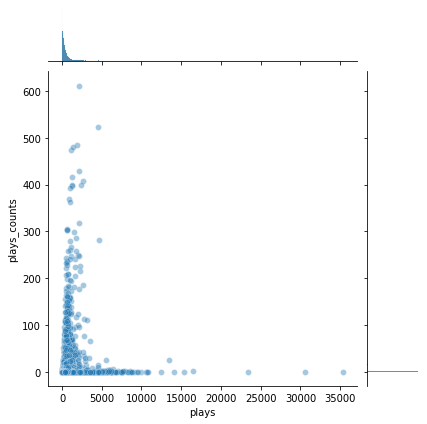

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='plays', y='plays_counts', data=plays_mean_count, alpha=0.4)

In [ ]:
user_artist_plays = data.pivot_table(index='userID', columns='name', values='plays')

In [ ]:
user_artist_plays.head()

name,!!!,!DISTAIN,!deladap,#####,#2 Orchestra,#NAME?,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,(We Are) Performance,(hed) Planet Earth,(sic)monic,*NSYNC,+\-,-123 min.,-OZ-,...And The Earth Swarmed With Them,...And You Will Know Us by the Trail of Dead,.38 Special,.crrust,06 Children Of The Cross,1-800-ZOMBIE,10 Years,10-20 Ð‘Ð•Ð— Ð’Ð«Ð¥ÐžÐ”ÐÐ«Ð¥,100 Bitches,1000names,100DEADRABBITS!!!,100blumen,100dBs,10cc,11.43,110,112,1125,12 Rounds,12 Stones,120 Days,1200 Micrograms,12012,...,ë°˜ì•¼,ë°•ì •í˜„,ë¹„,ë¹…ë±…,ë‚¨ë…€ê³µí•™,ë‚˜ë¥´ìƒ¤,ì´ë°•ì‚¬,ì´ì •í˜„,ì´ìˆ˜ì˜(ì—¬),ì´ìˆ˜ì˜(ì—¬);,ì´íš¨ë¦¬,ì œë¹µì™•,ìœ¤í•˜,ìŠ¹ë¦¬,ìž¥ê·¼ì„,ìƒ¤ì´ë‹ˆ,ìƒ¤ì´ë‹ˆ (SHINee),ì— ë¸”ëž™(MBLAQ),ì„œíƒœì§€,ì†ë‹´ë¹„,ì†¡ì§€ì€,ì†Œë…€ì‹œëŒ€,ì†Œë…€ì‹œëŒ€ ï¼† 2PM,ì• í”„í„° ìŠ¤ì¿¨(After School),ì•„ì´ë¹„,ì•„ì›ƒì‚¬ì´ë”,ì‹ í™”,ì‹œí¬ë¦¿,ì›ë”ê±¸ìŠ¤,íƒœì–‘,í˜„ì•„,í‹°ì•„ë¼,ï¼¬ï½•ï¼¬ï½•,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½Žï½…ï½“ï½“ï¼¡,ï½ï½ï½ƒï½ˆï½‰ï½Žï½…,ï½‚ï½ï½ï½‡ï½‰ï½…ï½ï½ï½Ž,ï½‚ï½ï½’ï½Ž
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
artist_ratings = user_artist_plays["Martin Solveig"]

In [ ]:
artist_ratings.head()

userID
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
Name: Martin Solveig, dtype: float64

In [ ]:
similar_artists = user_artist_plays.corrwith(artist_ratings)

corr_artist_ratings = pd.DataFrame(similar_artists, columns=['Correlation'])
corr_artist_ratings.dropna(inplace=True)
corr_artist_ratings.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
name,
Arctic Monkeys,1.000000
Armand van Helden,1.000000
Crystal Castles,1.000000
Daft Punk,0.999838
David Guetta,1.000000


In [ ]:
corr_artist_ratings.sort_values('Correlation', ascending=False).head(10)

,Correlation
name,
Kanye West,1.0
Armand van Helden,1.0
The Beatles,1.0
Pendulum,1.0
Lady Gaga,1.0
The White Stripes,1.0
David Guetta,1.0
Crystal Castles,1.0
Arctic Monkeys,1.0


In [ ]:
corr_artist_ratings = corr_artist_ratings.join(plays_mean_count['plays_counts'])
corr_artist_ratings.head()

,Correlation,plays_counts
name,,
Arctic Monkeys,1.000000,248
Armand van Helden,1.000000,5
Crystal Castles,1.000000,110
Daft Punk,0.999838,151
David Guetta,1.000000,155


In [ ]:
corr_artist_ratings[corr_artist_ratings ['plays_counts']>4].sort_values('Correlation', ascending=False).head(5)

,Correlation,plays_counts
name,,
Armand van Helden,1.0,5
Crystal Castles,1.0,110
David Guetta,1.0,155
Kanye West,1.0,134
Lady Gaga,1.0,611
